In [72]:
%matplotlib inline
import os

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import IPython.display as display


import rtmtools.clirad.sw.wrangle as swwrangle
import rtmtools.lblrtm.visualisation as viz

In [60]:
matplotlib.rcParams.update({'font.size': 16,
                            'xtick.direction': 'out',
                            'ytick.direction': 'out'})

In [36]:
dir_run = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O_gpts'

In [37]:
def path_clirad_output():
    filename = 'OUTPUT_CLIRAD_gpts.dat'
    return os.path.join(dir_run, filename)


def filepath_trank():
    filename = 'trank.dat'
    return os.path.join(dir_run, filename)


def load_trank_data(filepath='trank.dat'):
    df = pd.read_csv(filepath, sep=r'\s+')
    return df


def organise_th2o():
    df = pd.read_csv(os.path.join(dir_run, 'th2o.dat'), sep=r'\s+')
    df = df.drop('i', axis=1)
    df = df.set_index(['k1', 'k2', 'ibn', 'ik'])
    df = df.unstack(['ibn', 'ik'])
    return df


def export_to_excel():
    with pd.ExcelWriter('mls_H2O_gpts.xlsx') as writer:
        
        df_coolingrate = ds['cooling_rate']\
                             .to_dataframe()\
                             .unstack(['ib', 'ik'])
                
        df_fluxes = ds[['flux_up', 'flux_down']]\
                        .to_dataframe()\
                        .stack().unstack([0, 1, 3])
        
        df_h2o = organise_th2o()
        
        df_coolingrate.to_excel(writer, sheet_name='cooling_rate')
        df_fluxes.to_excel(writer, sheet_name='fluxes')
        df_h2o.to_excel(writer, sheet_name='th2o')

In [38]:
def plot_pressure_VS_dTdt_linearlog(ds, whichrate='heating_rate', ib=7):
    
    Nik = 6
    
    srss = [ds[whichrate].sel(ib=ib, ik=ik).to_pandas() 
            for ik in range(1, Nik + 1)]
    names = ['(ib, ik) = ({}, {})'.format(ib, ik) 
             for ik in range(1, Nik + 1)]
        
    #colours, linestyles = zip(*unique_colour_linestyle_pairs(Npairs = Nik))
    colours, linestyles = zip(*viz.matplotlib_colour_linestyle_tuples(N=Nik))
    
    ylabel, xlabel = 'pressure [mbar]', '{} [deg/day]'.format(whichrate)
    title = 'Band {}'.format(ib)
    figsize = (15, 10)
    
    fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                    names=names,
                                                    colours=colours,
                                                    linestyles=linestyles,
                                                    ylabel=ylabel,
                                                    xlabel=xlabel,
                                                    figsize=figsize,
                                                    title=title)
    return fig

In [29]:
def export_to_excel():
    with pd.ExcelWriter('mls_H2O_gpts.xlsx') as writer:
        
        df_coolingrate = ds['cooling_rate']\
                             .to_dataframe()\
                             .unstack(['ib', 'ik'])
                
        df_fluxes = ds[['flux_up', 'flux_down']]\
                        .to_dataframe()\
                        .stack().unstack([0, 1, 3])
        
        df_h2o = organise_th2o()
        
        df_coolingrate.to_excel(writer, sheet_name='cooling_rate')
        df_fluxes.to_excel(writer, sheet_name='fluxes')
        df_h2o.to_excel(writer, sheet_name='th2o')

In [39]:
ds = swwrangle.load_clirad_solirgpts(fpath=filepath(),
                                     signed_fluxes=True,
                                     cooling_rate=True)

In [32]:
export_to_excel()

# Plots

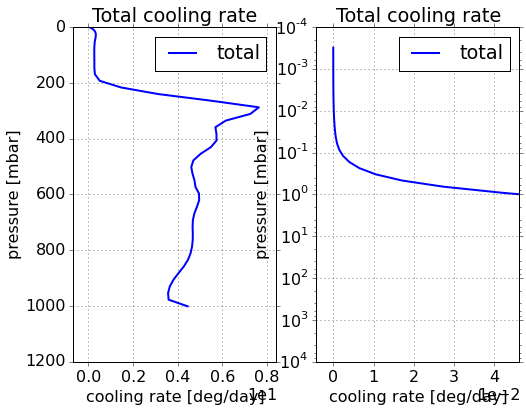

In [61]:
srs = ds['cooling_rate'].sum(dim=['ib', 'ik']).to_pandas()

names = ['total']
colours = ['b']
linestyles = ['-']
ylabel = 'pressure [mbar]'
xlabel = 'cooling rate [deg/day]'
figsize = (8, 6)
title = 'Total cooling rate'

fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=[srs],
                                                names=names,
                                                colours=colours,
                                                linestyles=linestyles,
                                                ylabel=ylabel,
                                                xlabel=xlabel,
                                                figsize=figsize,
                                                title=title)

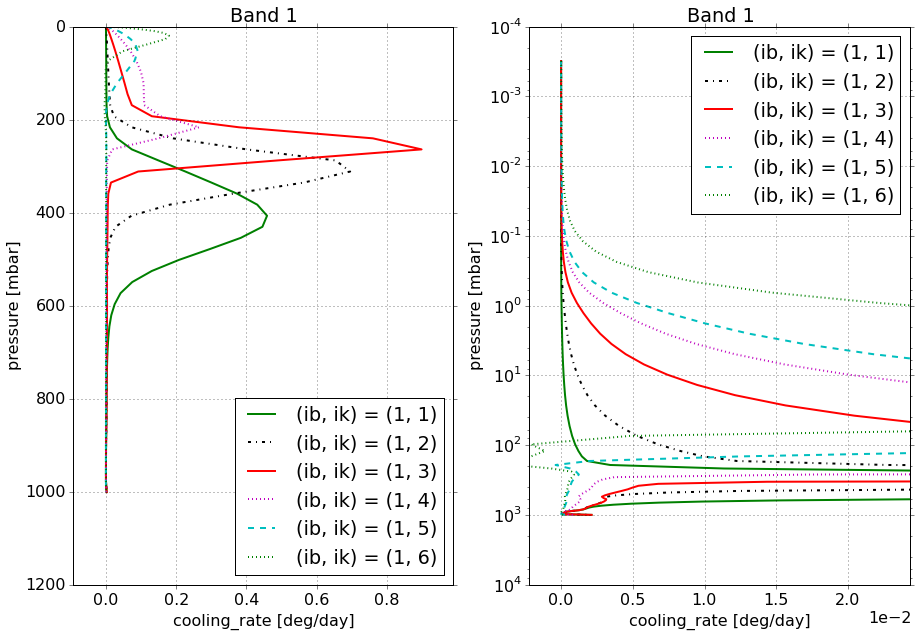

In [62]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=1)

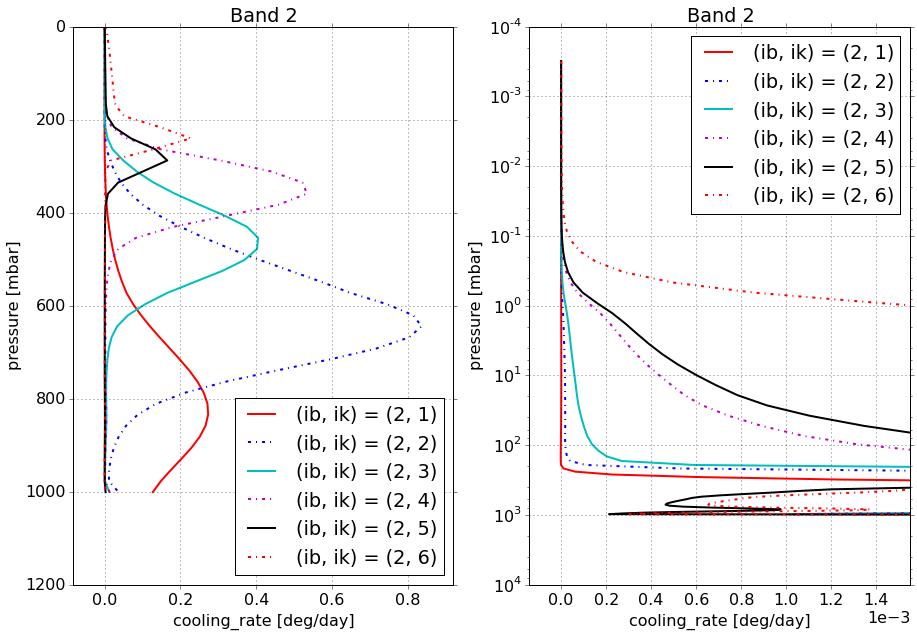

In [63]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=2)

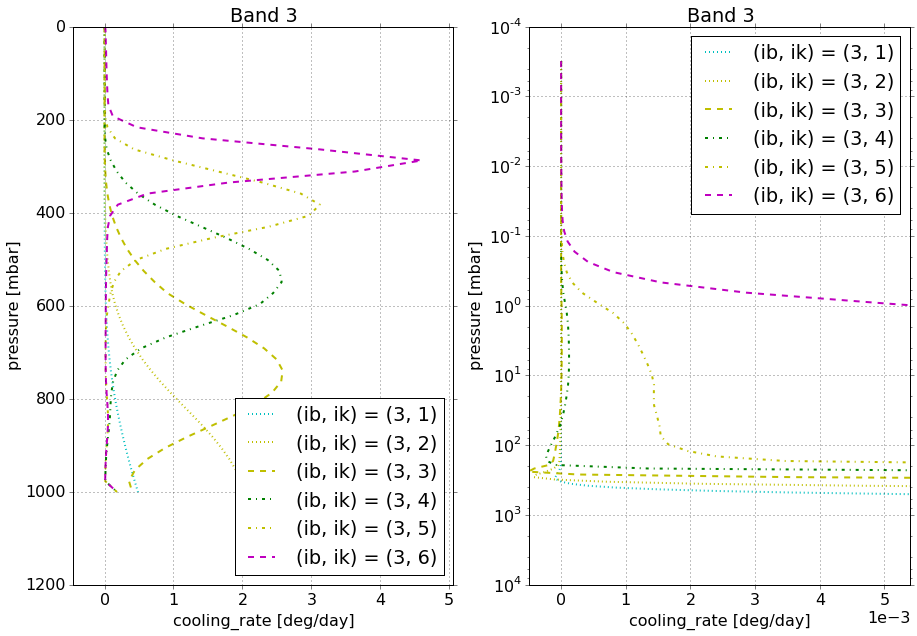

In [64]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=3)

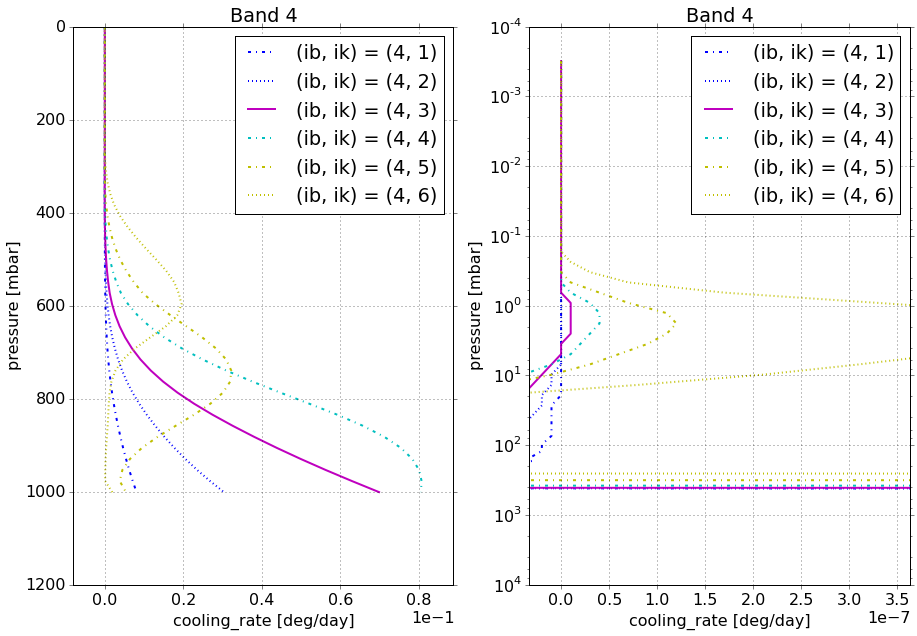

In [65]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=4)

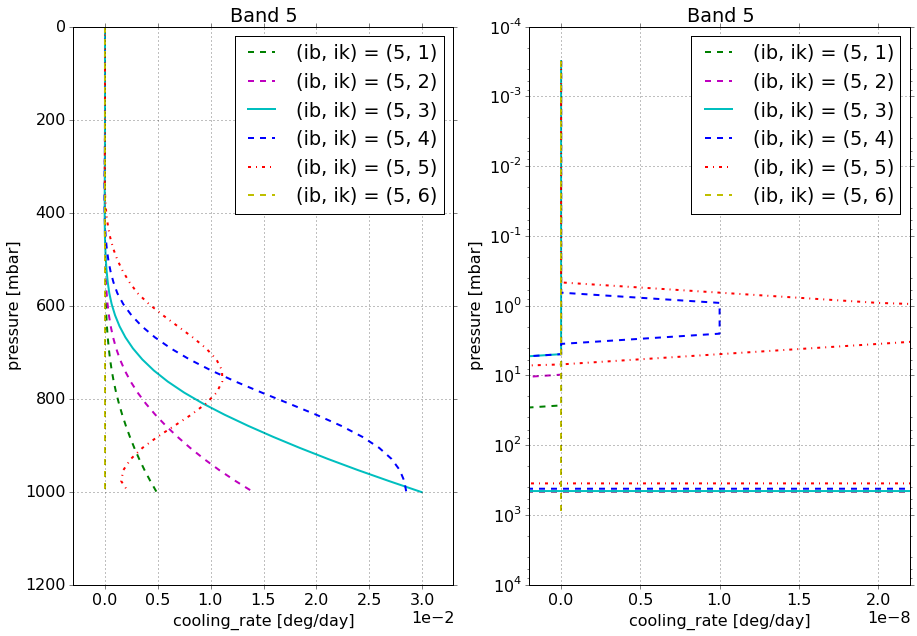

In [66]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=5)

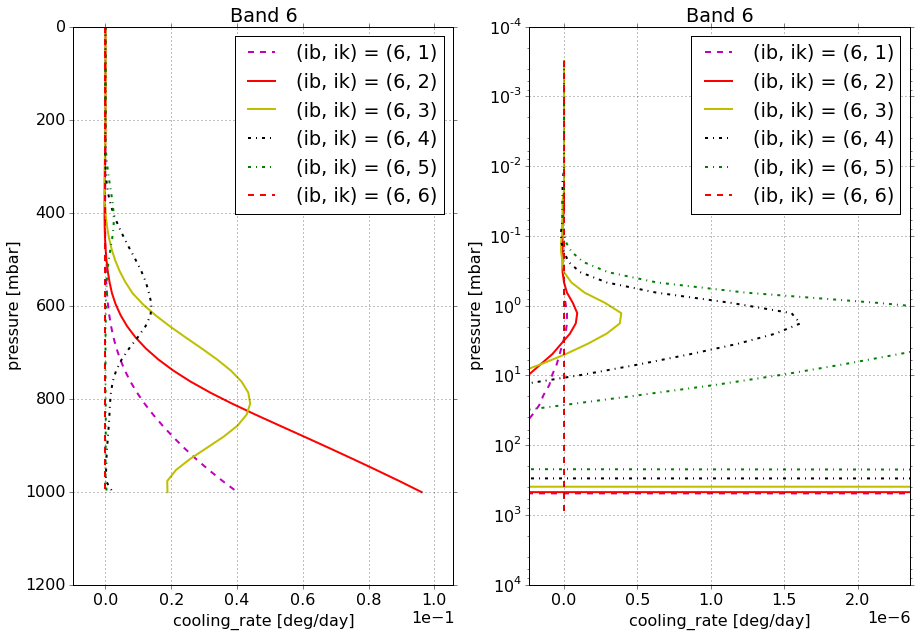

In [67]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=6)

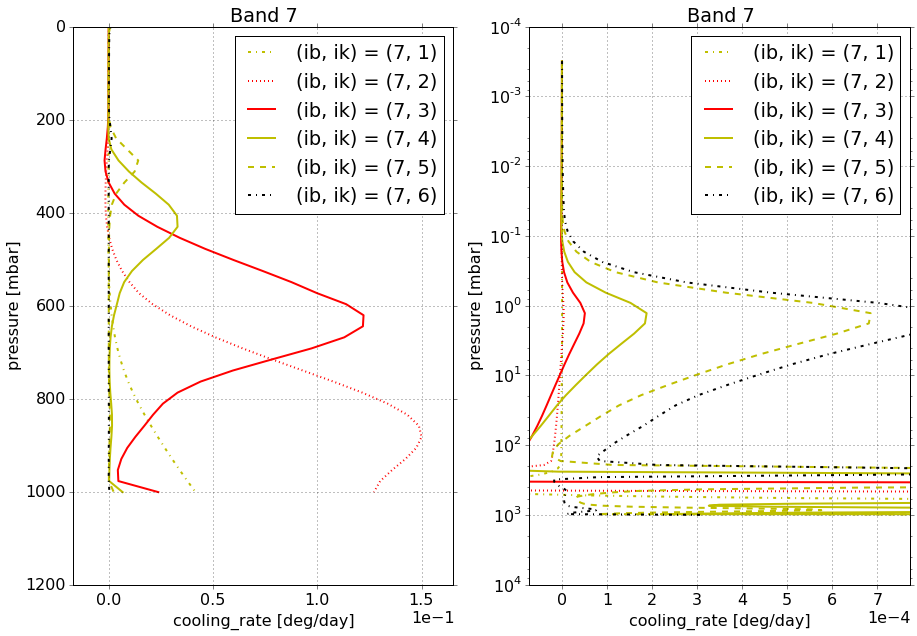

In [68]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=7)

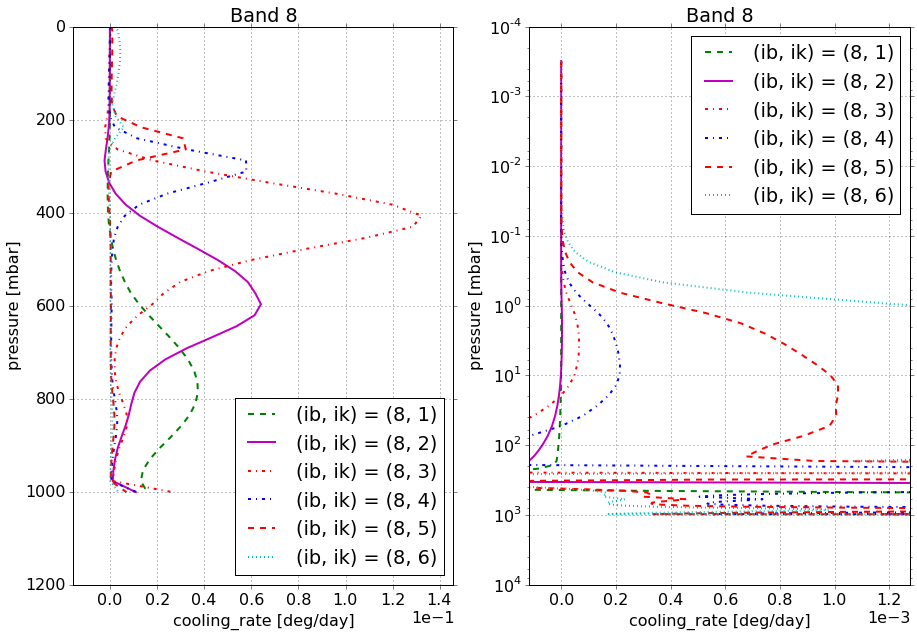

In [69]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=8)

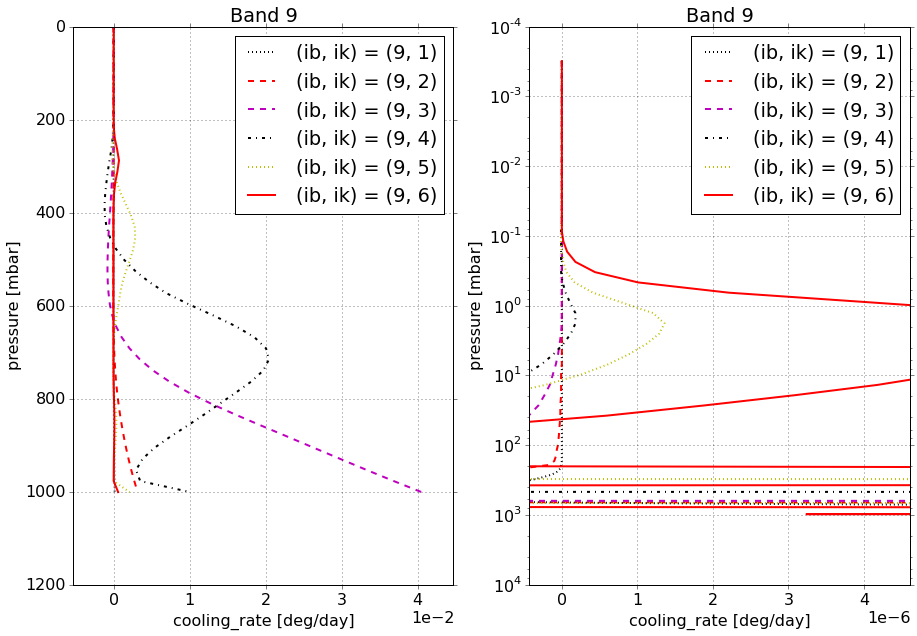

In [70]:
fig = plot_pressure_VS_dTdt_linearlog(ds, whichrate='cooling_rate', ib=9)

In [73]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')